# Multiclass Classification of Online Articles
## **Code part** of the case study on using NLP techniques alongside with Machine Learning Alrorithms to classify news into categories


## MODELS COMPARISON



In this notebook we will compare the result from all models for all cases.\
There is 2  cases one on imbalance data and other on balanced data:



First we need to get the files from drive

We will use the resulting prediction from our models to be the indicator of the performance.


In [22]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [23]:

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
cases_file_id = '1L7himJWikMYiZY0KGQb9SCQSIc_Mgi9s' #-- Updated File ID for my zip
downloaded = drive.CreateFile({'id': cases_file_id})
downloaded.GetContentFile('models_pred.zip')
#print('Downloaded content "{}"'.format(downloaded.GetContentString(encoding='cp862')))

In [25]:
! unzip models_pred.zip

Archive:  models_pred.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of models_pred.zip or
        models_pred.zip.zip, and cannot find models_pred.zip.ZIP, period.


We import the libraries


In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [27]:

from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score


# CASE 1 : IMBALANCED DATA

In the dataset there is more than 200k subjects, and as we do the classification using the **category** colums, we found as we see a big imbalance toward some categories.\
In this part we will compare the performence of the models, using all this dataset. Without touching on the imbalance.


We load the predictions for the first case

In [28]:
case_1_log_reg = pd.read_csv('CASE_1/pred_class_case_1_split_1_reg_log.csv')
case_1_log_reg = case_1_log_reg[['pred', 'true']]
log_reg_case_1 = case_1_log_reg[['pred', 'true']]


In [ ]:
#print(classification_report(log_reg_case_1.pred, log_reg_case_1.true))


In [29]:
case_1_rf = pd.read_csv('CASE_1/pred_class_case_1_split_1_rf.csv')
case_1_rf = case_1_rf[['pred', 'true']]
rf_case_1 = case_1_rf[['pred', 'true']]
#print(classification_report(rf_case_1.pred, case_1_rf.true))

In [30]:
case_1_nb = pd.read_csv('CASE_1/pred_class_case_1_split_1_nb.csv')
case_1_nb = case_1_nb[['pred', 'true']]
nb_case_1 = case_1_nb[['pred', 'true']]
#print(classification_report(nb_case_1.pred, case_1_nb.true))

In [31]:
case_1_bert = pd.read_csv('CASE_1/pred_class_case_1_split_2_bert.csv')
case_1_bert = case_1_bert[['pred', 'true']]
bert_case_1 = case_1_bert[['pred', 'true']]
#print(classification_report(bert_case_1.pred, case_1_bert.true))

In [32]:
case_1_svm = pd.read_csv('CASE_1/pred_class_case_1_split_1_svm.csv')
case_1_svm= case_1_svm[['pred', 'true']]
svm_case_1 = case_1_svm[['pred', 'true']]
#print(classification_report(svm_case_1.pred, case_1_svm.true))

In [33]:
from sklearn.metrics import f1_score
print('f1score')
svm_f1_score=f1_score(case_1_svm.true, svm_case_1.pred, average='weighted')*100
bert_f1_score=f1_score(case_1_bert.true, bert_case_1.pred, average='weighted')*100
nb_f1_score=f1_score(case_1_nb.true, nb_case_1.pred, average='weighted')*100
rf_f1_score=f1_score(case_1_rf.true, rf_case_1.pred, average='weighted')*100
lg_f1_score=f1_score(case_1_log_reg.true, log_reg_case_1.pred, average='weighted')*100
#####micro
svm_f1_score_mi=f1_score(case_1_svm.true, svm_case_1.pred, average='micro')*100
bert_f1_score_mi=f1_score(case_1_bert.true, bert_case_1.pred, average='micro')*100
nb_f1_score_mi=f1_score(case_1_nb.true, nb_case_1.pred, average='micro')*100
rf_f1_score_mi=f1_score(case_1_rf.true, rf_case_1.pred, average='micro')*100
lg_f1_score_mi=f1_score(case_1_log_reg.true, log_reg_case_1.pred, average='micro')*100
######macro
svm_f1_score_ma=f1_score(case_1_svm.true, svm_case_1.pred, average='macro')*100
bert_f1_score_ma=f1_score(case_1_bert.true, bert_case_1.pred, average='macro')*100
nb_f1_score_ma=f1_score(case_1_nb.true, nb_case_1.pred, average='macro')*100
rf_f1_score_ma=f1_score(case_1_rf.true, rf_case_1.pred, average='macro')*100
lg_f1_score_ma=f1_score(case_1_log_reg.true, log_reg_case_1.pred, average='macro')*100
print(svm_f1_score)
print(bert_f1_score)
print(nb_f1_score)
print(rf_f1_score)
print(lg_f1_score)
print(svm_f1_score_mi)
print('accuracy')
from sklearn.metrics import accuracy_score
svm_accuracy_score=accuracy_score(case_1_svm.true, svm_case_1.pred)*100
bert_accuracy_score=accuracy_score(case_1_bert.true, bert_case_1.pred)*100
nb_accuracy_score=accuracy_score(case_1_nb.true, nb_case_1.pred)*100
rf_accuracy_score=accuracy_score(case_1_rf.true, rf_case_1.pred)*100
lg_accuracy_score=accuracy_score(case_1_log_reg.true, log_reg_case_1.pred)*100
print(svm_accuracy_score)
print(bert_accuracy_score)
print(nb_accuracy_score)
print(rf_accuracy_score)
print(lg_accuracy_score)
print('kappa')
svm_kappa=cohen_kappa_score(case_1_svm.true, svm_case_1.pred)*100
bert_kappa=cohen_kappa_score(case_1_bert.true, bert_case_1.pred)*100
nb_kappa=cohen_kappa_score(case_1_nb.true, nb_case_1.pred)*100
rf_kappa=cohen_kappa_score(case_1_rf.true, rf_case_1.pred)*100
lg_kappa=cohen_kappa_score(case_1_log_reg.true, log_reg_case_1.pred)*100
print(svm_kappa)


f1score
58.85209068673153
65.59394978308238
55.33042894897081
55.59158548714769
62.989226365149264
59.19410515135423
accuracy
59.19410515135423
66.95159084119888
59.89610993096123
57.9875862984599
63.76958311205523
kappa
56.134612820209576


In [34]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


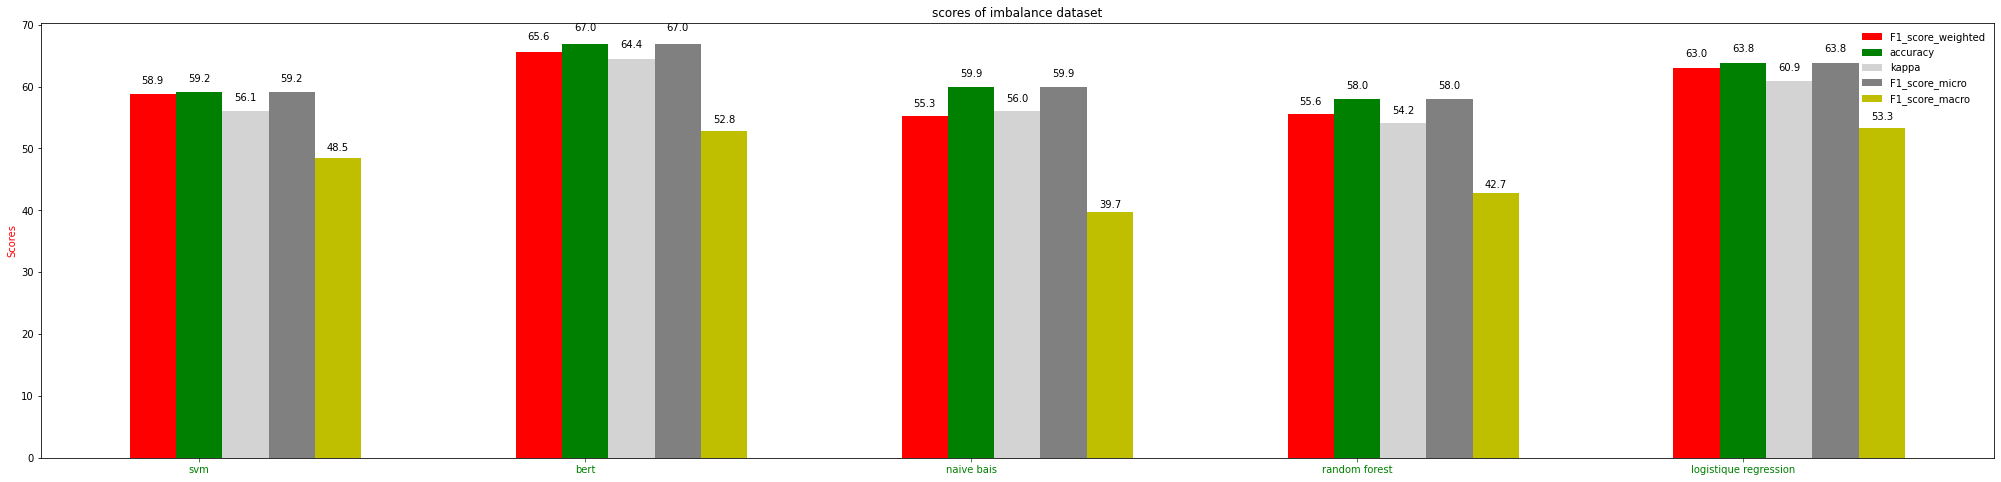

In [35]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.12   # the width of the bars

fig = plt.figure(figsize=(35,8))
plt.title('scores of imbalance dataset')
ax = fig.add_subplot(111)


yvals = [svm_f1_score, bert_f1_score, nb_f1_score,rf_f1_score,lg_f1_score]
rects1 = ax.bar(ind, yvals, width, color='r')

zvals = [svm_accuracy_score, bert_accuracy_score, nb_accuracy_score,rf_accuracy_score,lg_accuracy_score]
rects2 = ax.bar(ind+width, zvals, width, color='g')

kvals = [svm_kappa, bert_kappa, nb_kappa,rf_kappa,lg_kappa]
rects3 = ax.bar(ind+width+width, kvals, width, color='lightgray')
rvals = [svm_f1_score_mi, bert_f1_score_mi, nb_f1_score_mi,rf_f1_score_mi,lg_f1_score_mi]
rects4 = ax.bar(ind+width+width+width, rvals, width, color='gray')
lvals = [svm_f1_score_ma, bert_f1_score_ma, nb_f1_score_ma,rf_f1_score_ma,lg_f1_score_ma]
rects5 = ax.bar(ind+width+width+width+width, lvals, width, color='y')

ax.set_ylabel('Scores').set_color('red')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('svm', 'bert', 'naive bais', 'random forest', 'logistique regression') )
ax.tick_params(axis='x', colors='green')

ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('F1_score_weighted', 'accuracy','kappa','F1_score_micro','F1_score_macro'),frameon=False, loc='upper right' )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%0.1f'%float(h),
                ha='center', va='top')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()

# CASE2  : BALANCED DATASET

In this part we will compare the performence of the models, for this models we used a balanced dataset.1k for each category

In [36]:
case_2_log_reg = pd.read_csv('CASE_2/pred_class_case_2_split_1_reg_log.csv')
case_2_log_reg = case_2_log_reg[['pred', 'true']]
log_reg_case_2 = case_2_log_reg[['pred', 'true']]

In [37]:
case_2_rf = pd.read_csv('CASE_2/pred_class_case_2_split_1_rf.csv')
case_2_rf = case_2_rf[['pred', 'true']]
rf_case_2 = case_2_rf[['pred', 'true']]

In [38]:
case_2_nb = pd.read_csv('CASE_2/pred_class_case_2_split_1_nb.csv')
case_2_nb = case_2_nb[['pred', 'true']]
nb_case_2= case_2_nb[['pred', 'true']]

In [39]:
case_2_bert = pd.read_csv('CASE_2/pred_class_case_2_split_2_bert.csv')
case_2_bert = case_2_bert[['pred', 'true']]
bert_case_2 = case_2_bert[['pred', 'true']]

In [40]:
case_2_svm = pd.read_csv('CASE_2/pred_class_case_2_split_1_svm.csv')
case_2_svm= case_2_svm[['pred', 'true']]
svm_case_2 = case_2_svm[['pred', 'true']]

In [41]:
from sklearn.metrics import f1_score
print('f1score')
svm_f1_score_2=f1_score(case_2_svm.true, svm_case_2.pred, average='weighted')*100
bert_f1_score_2=f1_score(case_2_bert.true, bert_case_2.pred, average='weighted')*100
nb_f1_score_2=f1_score(case_2_nb.true, nb_case_2.pred, average='weighted')*100
rf_f1_score_2=f1_score(case_2_rf.true, rf_case_2.pred, average='weighted')*100
lg_f1_score_2=f1_score(case_2_log_reg.true, log_reg_case_2.pred, average='weighted')*100
###micro
svm_f1_score_mi_2=f1_score(case_2_svm.true, svm_case_2.pred, average='micro')*100
bert_f1_score_mi_2=f1_score(case_2_bert.true, bert_case_2.pred, average='micro')*100
nb_f1_score_mi_2=f1_score(case_2_nb.true, nb_case_2.pred, average='micro')*100
rf_f1_score_mi_2=f1_score(case_2_rf.true, rf_case_2.pred, average='micro')*100
lg_f1_score_mi_2=f1_score(case_2_log_reg.true, log_reg_case_2.pred, average='micro')*100

######macro
svm_f1_score_ma_2=f1_score(case_2_svm.true, svm_case_2.pred, average='macro')*100
bert_f1_score_ma_2=f1_score(case_2_bert.true, bert_case_2.pred, average='macro')*100
nb_f1_score_ma_2=f1_score(case_2_nb.true, nb_case_2.pred, average='macro')*100
rf_f1_score_ma_2=f1_score(case_2_rf.true, rf_case_2.pred, average='macro')*100
lg_f1_score_ma_2=f1_score(case_2_log_reg.true, log_reg_case_2.pred, average='macro')*100
print('accuracy')
from sklearn.metrics import accuracy_score
svm_accuracy_score_2=accuracy_score(case_2_svm.true, svm_case_2.pred)*100
bert_accuracy_score_2=accuracy_score(case_2_bert.true, bert_case_2.pred)*100
nb_accuracy_score_2=accuracy_score(case_2_nb.true, nb_case_2.pred)*100
rf_accuracy_score_2=accuracy_score(case_2_rf.true, rf_case_2.pred)*100
lg_accuracy_score_2=accuracy_score(case_2_log_reg.true, log_reg_case_2.pred)*100

print('kappa')
svm_kappa_2=cohen_kappa_score(case_2_svm.true, svm_case_2.pred)*100
bert_kappa_2=cohen_kappa_score(case_2_bert.true, bert_case_2.pred)*100
nb_kappa_2=cohen_kappa_score(case_2_nb.true, nb_case_2.pred)*100
rf_kappa_2=cohen_kappa_score(case_2_rf.true, rf_case_2.pred)*100
lg_kappa_2=cohen_kappa_score(case_2_log_reg.true, log_reg_case_2.pred)*100


f1score
accuracy
kappa


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


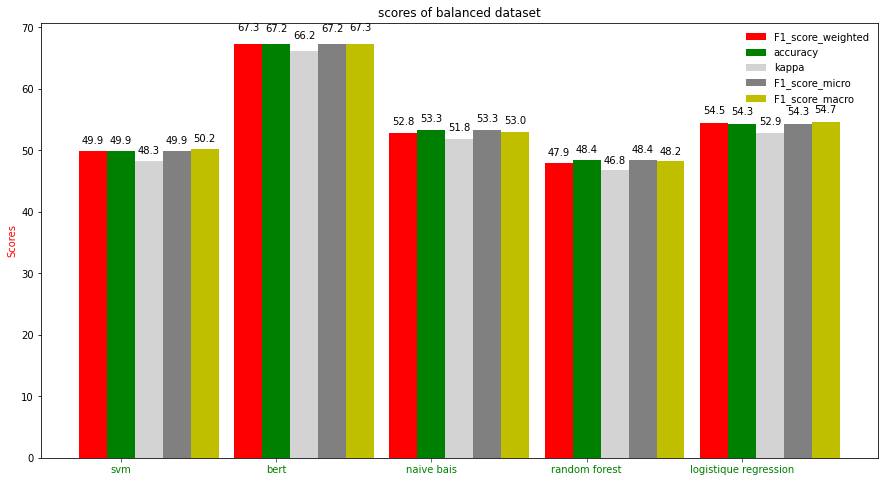

In [43]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.18  # the width of the bars

fig = plt.figure(figsize=(15,8))
plt.title('scores of balanced dataset')
ax = fig.add_subplot(111)


yvals = [svm_f1_score_2, bert_f1_score_2, nb_f1_score_2,rf_f1_score_2,lg_f1_score_2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [svm_accuracy_score_2, bert_accuracy_score_2, nb_accuracy_score_2,rf_accuracy_score_2,lg_accuracy_score_2]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [svm_kappa_2, bert_kappa_2, nb_kappa_2,rf_kappa_2,lg_kappa_2]
rects3 = ax.bar(ind+width+width, kvals, width, color='lightgray')
rvals = [svm_f1_score_mi_2, bert_f1_score_mi_2, nb_f1_score_mi_2,rf_f1_score_mi_2,lg_f1_score_mi_2]
rects4 = ax.bar(ind+width+width+width, rvals, width, color='gray')
lvals = [svm_f1_score_ma_2, bert_f1_score_ma_2, nb_f1_score_ma_2,rf_f1_score_ma_2,lg_f1_score_ma_2]
rects5 = ax.bar(ind+width+width+width+width, lvals, width, color='y')

ax.set_ylabel('Scores').set_color('red')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('svm', 'bert', 'naive bais', 'random forest', 'logistique regression') )
ax.tick_params(axis='x', colors='green')

ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('F1_score_weighted', 'accuracy','kappa','F1_score_micro','F1_score_macro'),frameon=False, loc='upper right' )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%0.1f'%float(h),
                ha='center', va='top')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)

plt.show()